# Predicting High Risk Customers For Loan Defaults

# The files for the lending club loan data contains complete loan data for all loans issued through the 2007-2015, including the current loan status (Current, Late, Fully Paid, etc.) and latest payment information. We are attempting to determine the probability if a bank customer will default on a particular loan or not.

# link: https://www.kaggle.com/wendykan/lending-club-loan-data

###  Sukrit Gulati(A20352918), Srishti Negi(A20351640)

In [98]:
##importing all the required libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier as RFC
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix
from sklearn.model_selection import KFold
%matplotlib inline

In [2]:
##reading the data in the pandas data frame
data = pd.read_csv("data/loan.csv", header = 0)

/Users/prateekagrawal/anaconda/envs/python3/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
##printing the shape of the data
data.shape

(887379, 74)

In [4]:
##printing the name of the columns of the data
data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
    

In [5]:
##function to populate the Target variable
def populate_target(row):
    if row['loan_status'] == 'Fully Paid':
        return 1
    else:
        return 0
#Calling the populate_target function to populate the target variable.
data['target'] = data.apply (lambda row: populate_target (row),axis=1)  

In [6]:
##dropping the loan_status column
data.drop(['loan_status'],axis=1,inplace=True)

In [7]:
##dropping the columns which are not useful for prediction
data.drop(['id','member_id','title', 'emp_title','zip_code', 'addr_state',
              'issue_d','url','desc','earliest_cr_line',
              'total_rec_late_fee', 'last_pymnt_d' ,'next_pymnt_d' , 
              'last_credit_pull_d'], axis=1, inplace=True)



In [8]:
##calculating the null values in each column
data.isnull().sum()

loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
int_rate                            0
installment                         0
grade                               0
sub_grade                           0
emp_length                          0
home_ownership                      0
annual_inc                          4
verification_status                 0
pymnt_plan                          0
purpose                             0
dti                                 0
delinq_2yrs                        29
inq_last_6mths                     29
mths_since_last_delinq         454312
mths_since_last_record         750326
open_acc                           29
pub_rec                            29
revol_bal                           0
revol_util                        502
total_acc                          29
initial_list_status                 0
out_prncp                           0
out_prncp_in

In [9]:
##getting the names of the columns with nulls more than 50% of null values
col_with_null_values = []
j= 0
for i in data.isnull().sum():
    
    if i >= (data.shape[0]/2):
        col_with_null_values.append(j)
        
    j = j+1
        


In [10]:
##20 columns where found with more than 50% data as NAN
len(col_with_null_values)

20

In [11]:
##dropping the column found above
data = data.drop(data.columns[col_with_null_values],axis=1)

In [12]:
data.shape

(887379, 40)

In [13]:
##dropping all the rows with at least one NAN value in it
data = data.dropna()

In [14]:
data.shape

(816722, 40)

In [16]:
##creating object of Label Encoder
le = LabelEncoder()

In [17]:
##converting the term column in numeric form
data['term'] = le.fit_transform(data['term'])

In [18]:
##keeping only the data were the term value is for 36 months to decrease the complexity of the data set
data = data[data['term'] == 0]

In [19]:
##dropping the term column
data = data.drop(['term'],axis=1)

In [20]:
data.shape

(566768, 39)

In [21]:
##converting all the categorical data into numeric labels
data['grade'] = le.fit_transform(data['grade'])
data['sub_grade'] = le.fit_transform(data['sub_grade'])
data['emp_length'] = le.fit_transform(data['emp_length'])
data['home_ownership'] = le.fit_transform(data['home_ownership'])
data['verification_status'] = le.fit_transform(data['verification_status'])
data['pymnt_plan'] = le.fit_transform(data['pymnt_plan'])
data['purpose'] = le.fit_transform(data['purpose'])
data['application_type'] = le.fit_transform(data['application_type'])
data['initial_list_status'] = le.fit_transform(data['initial_list_status'])

In [23]:
##final shape of the data after preprocessing
data.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'pymnt_plan', 'purpose', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med', 'policy_code',
       'application_type', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal',
       'total_rev_hi_lim', 'target'],
      dtype='object')

In [24]:
##getting the statistics of all the columns
data.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,target
count,566768.000000,566768.000000,566768.000000,566768.000000,566768.000000,566768.000000,566768.000000,566768.000000,566768.000000,5.667680e+05,...,566768.000000,566768.000000,566768.000000,566768.0,566768.000000,566768.000000,5.667680e+05,5.667680e+05,5.667680e+05,566768.000000
mean,12685.059451,12685.056584,12679.826333,12.054834,420.397599,1.430003,9.095912,4.136758,3.019950,7.308654e+04,...,2.906921,1905.469992,0.016268,1.0,0.000422,0.005186,2.418042e+02,1.281642e+05,3.046732e+04,0.215727
std,7844.833585,7844.836694,7841.882355,3.880450,261.123638,1.119844,5.523999,3.558198,1.920509,6.715269e+04,...,39.486982,4051.902963,0.144071,0.0,0.020531,0.080137,1.231101e+04,1.518399e+05,3.932970e+04,0.411326
min,1000.000000,1000.000000,900.000000,5.320000,30.120000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,7000.000000,7000.000000,7000.000000,8.900000,227.490000,1.000000,5.000000,1.000000,1.000000,4.300000e+04,...,0.000000,247.460000,0.000000,1.0,0.000000,0.000000,0.000000e+00,2.550400e+04,1.280000e+04,0.000000
50%,10000.000000,10000.000000,10000.000000,11.990000,347.810000,1.000000,8.000000,3.000000,4.000000,6.010950e+04,...,0.000000,421.610000,0.000000,1.0,0.000000,0.000000,0.000000e+00,6.439700e+04,2.190000e+04,0.000000
75%,16800.000000,16800.000000,16800.000000,14.480000,554.890000,2.000000,13.000000,7.000000,5.000000,8.800000e+04,...,0.000000,858.050000,0.000000,1.0,0.000000,0.000000,0.000000e+00,1.900892e+05,3.740000e+04,0.000000
max,35000.000000,35000.000000,35000.000000,28.990000,1445.460000,6.000000,34.000000,11.000000,5.000000,9.000000e+06,...,5694.093600,36188.840000,20.000000,1.0,1.000000,14.000000,9.152545e+06,8.000078e+06,9.999999e+06,1.000000


In [ ]:
##histograms and bar plot for 10 selected columns

/Users/prateekagrawal/anaconda/envs/python3/lib/python3.4/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/Users/prateekagrawal/anaconda/envs/python3/lib/python3.4/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


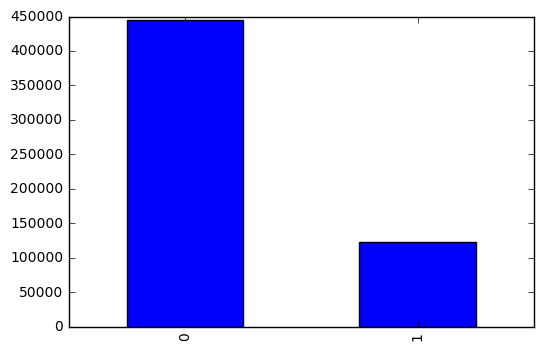

In [25]:
data.target.value_counts().plot(kind='bar')

In [ ]:
data.grade.value_counts().plot(kind='bar')
plt.xlabel("grade")
plt.ylabel("frequency")
plt.title("grade")

In [ ]:
data.emp_length.value_counts().plot(kind='bar')
plt.xlabel("emplyment length")
plt.ylabel("frequency")
plt.title("emp_length")

In [ ]:
data.home_ownership.value_counts().plot(kind='bar')
plt.xlabel("home ownership")
plt.ylabel("frequency")
plt.title("home_ownership")

In [ ]:
data.initial_list_status.value_counts().plot(kind='bar')
plt.xlabel("initial list status")
plt.ylabel("frequency")
plt.title("initial_list_status")

In [ ]:
data.purpose.value_counts().plot(kind='bar')
plt.xlabel("purpose")
plt.ylabel("frequency")
plt.title("purpose")

In [ ]:
data.verification_status.value_counts().plot(kind='bar')
plt.xlabel("verification status")
plt.ylabel("frequency")
plt.title("verification_status")

In [ ]:
data.sub_grade.value_counts().plot(kind='bar')
plt.xlabel("sub_grade")
plt.ylabel("frequency")
plt.title("sub_grade")

In [ ]:
plt.hist(data['int_rate'],bins=20)
plt.xlabel("interest Rate")
plt.ylabel('Frequency')
plt.title("int_rate")

In [ ]:
plt.hist(data['funded_amnt'],bins=20)
plt.xlabel("funded amount")
plt.ylabel('Frequency')
plt.title("funded_amnt")

In [ ]:
plt.hist(data['installment'],bins=20)
plt.xlabel("installment")
plt.ylabel('Frequency')
plt.title("installment")


In [ ]:
data.corr()

In [26]:
data.shape

(566768, 39)

In [27]:
np.var(data)

loan_amnt                     6.154131e+07
funded_amnt                   6.154135e+07
funded_amnt_inv               6.149501e+07
int_rate                      1.505787e+01
installment                   6.818543e+04
grade                         1.254049e+00
sub_grade                     3.051451e+01
emp_length                    1.266075e+01
home_ownership                3.688348e+00
annual_inc                    4.509476e+09
verification_status           6.472126e-01
pymnt_plan                    7.057512e-06
purpose                       5.221904e+00
dti                           4.228595e+02
delinq_2yrs                   7.967259e-01
inq_last_6mths                9.168808e-01
open_acc                      2.777138e+01
pub_rec                       3.951103e-01
revol_bal                     4.978398e+08
revol_util                    5.544513e+02
total_acc                     1.388828e+02
initial_list_status           2.497502e-01
out_prncp                     5.005568e+07
out_prncp_i

In [28]:
sel = VarianceThreshold()

In [29]:
sel.fit(data)

VarianceThreshold(threshold=0.0)

In [30]:
sel.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True], dtype=bool)

In [31]:
col = data.columns

In [32]:
col = col[sel.get_support()]

In [33]:
col

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'pymnt_plan', 'purpose', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med', 'application_type',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'target'],
      dtype='object')

In [34]:
x = sel.fit_transform(data)

In [35]:
data = pd.DataFrame(x)

In [36]:
data.shape

(566768, 38)

In [37]:
data.columns = col

In [38]:
X = data.corr()

In [39]:
X.shape

(38, 38)

In [40]:
correlated = []
for i in col:
    for j in col:
        if i!= j:
            correlation=data[i].corr(data[j])
            if correlation > 0.9 and (j,i) not in correlated:
                correlated.append((i,j))
        

In [41]:
correlated

[('loan_amnt', 'funded_amnt'),
 ('loan_amnt', 'funded_amnt_inv'),
 ('loan_amnt', 'installment'),
 ('funded_amnt', 'funded_amnt_inv'),
 ('funded_amnt', 'installment'),
 ('funded_amnt_inv', 'installment'),
 ('int_rate', 'grade'),
 ('int_rate', 'sub_grade'),
 ('grade', 'sub_grade'),
 ('out_prncp', 'out_prncp_inv'),
 ('total_pymnt', 'total_pymnt_inv'),
 ('total_pymnt', 'total_rec_prncp'),
 ('total_pymnt_inv', 'total_rec_prncp')]

In [42]:
a=[]
for i in correlated:
    a.append(i[0])

In [43]:
a

['loan_amnt',
 'loan_amnt',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'int_rate',
 'int_rate',
 'grade',
 'out_prncp',
 'total_pymnt',
 'total_pymnt',
 'total_pymnt_inv']

In [44]:
a = set(a)

In [47]:
data.drop(a,inplace=True,axis=1)

In [70]:
data.shape

(566768, 28)

In [52]:
train_data, validation_data, train_label, validation_label = train_test_split(data.ix[:,:-1],data['target'],train_size=0.80, random_state=100)

In [111]:
print (train_data.shape)
print (train_label.shape)
print (validation_data.shape)
print (validation_label.shape)

(453414, 27)
(453414,)
(113354, 27)
(113354,)


In [72]:
train_data.index = range(train_data.shape[0])
train_label.index = range(train_label.shape[0])
validation_data.index = range(validation_data.shape[0])
validation_label.index = range(validation_label.shape[0])

In [ ]:
data_0 = data[data['target'] == 0]

In [ ]:
data_1 = data[data['target'] == 1].sample(n = sum(data['target'] == 0),replace = True)

In [ ]:
data_1.shape

In [ ]:
data_0.shape

In [ ]:
data = pd.concat([data_0,data_1]).sample(frac = 0.5,random_state = 100)

In [ ]:
data.shape

In [ ]:
data.target.value_counts()

In [55]:
forest = RFC(100)

In [56]:
forest.fit(train_data,train_label)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [57]:
importance = np.array(forest.feature_importances_)

In [58]:
importance

array([  2.68346885e-02,   3.68878409e-03,   7.19185932e-04,
         2.65847559e-04,   2.18929025e-03,   1.01746033e-03,
         6.11783542e-07,   9.44299377e-04,   2.14164906e-03,
         2.66985235e-04,   1.01643423e-03,   9.13972529e-04,
         2.56813941e-04,   3.15198969e-03,   1.48518551e-03,
         1.07200033e-03,   3.01311139e-03,   4.12218251e-01,
         1.69444447e-01,   1.97079543e-02,   1.30682474e-02,
         9.06230423e-03,   3.23858679e-01,   3.10395396e-05,
         1.30600488e-06,   1.64468838e-05,   4.28269904e-04,
         1.48699050e-03,   1.69775457e-03])

In [59]:
norm_importance = importance * 100/sum(importance)

In [60]:
index = np.argsort(norm_importance)[::-1]

In [61]:
norm_importance = norm_importance[index]

In [64]:
train_data.columns[index]

Index(['out_prncp_inv', 'last_pymnt_amnt', 'total_rec_prncp', 'installment',
       'total_rec_int', 'recoveries', 'collection_recovery_fee', 'sub_grade',
       'revol_bal', 'initial_list_status', 'annual_inc', 'dti',
       'total_rev_hi_lim', 'tot_cur_bal', 'revol_util', 'total_acc',
       'verification_status', 'inq_last_6mths', 'purpose', 'open_acc',
       'emp_length', 'tot_coll_amt', 'delinq_2yrs', 'home_ownership',
       'pub_rec', 'collections_12_mths_ex_med', 'acc_now_delinq',
       'application_type', 'pymnt_plan'],
      dtype='object')

In [65]:
train_data.drop(['application_type', 'pymnt_plan'],axis = 1, inplace=True)


In [73]:
validation_data.drop(['application_type', 'pymnt_plan'],axis = 1, inplace=True)

In [108]:
fold = KFold(5)
k = fold.split(train_data)

In [110]:
allFscore = []
j = 0
for trainIndex, testIndex in k:
    
    
    
    j += 1    
    iteration = 'Iteration_' + str(j)
    print (iteration)
    train_data_cv = train_data.ix[trainIndex]
    train_label_cv = train_label.ix[trainIndex]
    test_data_cv =  train_data.ix[testIndex]
    test_label_cv = train_label.ix[testIndex]
    
    print (train_data_cv.shape)
    print (train_label_cv.shape)
    print (test_data_cv.shape)
    print (test_label_cv.shape)
    
    clf = LogisticRegression()
    clf.fit(train_data_cv,train_label_cv)
    prediction = clf.predict(test_data_cv)
                    
    accuracy = accuracy_score(test_label_cv,prediction)
    precision,recall,fscore,support = precision_recall_fscore_support(test_label_cv,prediction)
    confusionmatrix = confusion_matrix(test_label_cv,prediction)
    
    print (accuracy)               
    print (fscore)
    print (confusionmatrix)
                   
    allFscore.append(f_score)
print (allFscore)

Iteration_1
(362731, 27)
(362731,)
(90683, 27)
(90683,)
0.998301776518
[ 0.99891587  0.99608302]
[[70948   147]
 [    7 19581]]
Iteration_2
(362731, 27)
(362731,)
(90683, 27)
(90683,)
0.998401023345
[ 0.99897825  0.99632474]
[[70884   145]
 [    0 19654]]
Iteration_3
(362731, 27)
(362731,)
(90683, 27)
(90683,)
0.994078272664
[ 0.99622482  0.98627336]
[[70854   295]
 [  242 19292]]
Iteration_4
(362731, 27)
(362731,)
(90683, 27)
(90683,)
0.998048145738
[ 0.99875172  0.99552703]
[[70809   160]
 [   17 19697]]
Iteration_5
(362732, 27)
(362732,)
(90682, 27)
(90682,)
0.998786969851
[ 0.99922725  0.99718064]
[[71119   104]
 [    6 19453]]
[array([ 0.99922725,  0.99718064]), array([ 0.99922725,  0.99718064]), array([ 0.99922725,  0.99718064]), array([ 0.99922725,  0.99718064]), array([ 0.99922725,  0.99718064])]


In [112]:
clf = LogisticRegression()
clf.fit(train_data,train_label)
prediction = clf.predict(validation_data)
                    
accuracy = accuracy_score(validation_label,prediction)
precision,recall,fscore,support = precision_recall_fscore_support(validation_label,prediction)
confusionmatrix = confusion_matrix(validation_label,prediction)
    
print (accuracy)               
print (fscore)
print (confusionmatrix)

0.993427669072
[ 0.99581317  0.9847239 ]
[[88597   439]
 [  306 24012]]


In [113]:
validation_label.value_counts()

0.0    89036
1.0    24318
Name: target, dtype: int64

In [117]:
88597 + 439

89036

In [118]:
24012 + 306

24318